<a href="https://colab.research.google.com/github/zalsulaim/datasciencecoursera/blob/master/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 All Tadawul + Funds Link  
https://www.saudiexchange.sa/tadawul.eportal.theme.helper/ThemeSearchUtilityServlet

Asset Data Link
https://www.saudiexchange.sa/Charts/ChartGenerator?chart-type=SQL_CI_CV_COM&chart-parameter=2020&methodType=parsingMethod


Asset History partial link 

https://www.saudiexchange.sa/wps/tadawul.eportal.company.info/js/company-history-chart.js?_=1621011802953

In [3]:
import pandas as pd 
sn=pd.read_json('https://www.saudiexchange.sa/tadawul.eportal.theme.helper/ThemeSearchUtilityServlet')
sn 

,symbol,companyNameEN,companyNameAR,companyName,market_type,tradingNameEn,tradingNameAr,isin,bond_type
0,8220,Weqaya Takaful Insurance and Reinsurance Co.,شركة وقاية للتأمين وإعادة التأمين التكافلي,Weqaya Takaful Insurance and Reinsurance Co.,M,Weqaya Takaful,وقاية للتكافل,SA12A0540E19,NaN
1,4002,Mouwasat Medical Services Co.,شركة المواساة للخدمات الطبية,Mouwasat Medical Services Co.,M,MOUWASAT,المواساة,SA12C051UH11,NaN
2,8270,Buruj Cooperative Insurance Co.,شركة بروج للتأمين التعاوني,Buruj Cooperative Insurance Co.,M,BURUJ,بروج للتأمين,SA12CG541714,NaN
3,8312,Alinma Tokio Marine Co.,شركة الإنماء طوكيو مارين,Alinma Tokio Marine Co.,M,ALINMA TOKIO M,الإنماء طوكيو م,SA131G541S17,NaN
4,4240,Fawaz Abdulaziz Alhokair Co.,شركة فواز عبدالعزيز الحكير وشركاه,Fawaz Abdulaziz Alhokair Co.,M,ALHOKAIR,الحكير,SA000A0LB2R6,NaN
...,...,...,...,...,...,...,...,...,...
546,155002,Comprehensive Equity Fund,الصندوق الشامل للأسهم,Comprehensive Equity Fund,F,NaN,NaN,155002,NaN
547,005029,Saudi Fransi GCC IPO Fund,صندوق السعودي الفرنسي الخليجي للطروحات الأوليه,Saudi Fransi GCC IPO Fund,F,NaN,NaN,005029,NaN
548,006015,HSBC US Dollar Murabaha Fund,صندوق إتش إس بي سي للمرابحة بالدولار&#13;الأمريكي,HSBC US Dollar Murabaha Fund,F,NaN,NaN,006015,NaN
549,004009,Al Yusr SAR Morabaha Fund,صندوق اليسر للمرابحة بالريال السعودي,Al Yusr SAR Morabaha Fund,F,NaN,NaN,004009,NaN


In [32]:
import datetime
import pandas as pd 
sym=2010
sd=pd.read_json('https://www.saudiexchange.sa/Charts/ChartGenerator?chart-type=SQL_CI_CV_COM&chart-parameter={}&methodType=parsingMethod'.format(sym))

sd.set_index('dateTime', inplace=True)
sd['Day']=sd.index.day_name()
sd


,indexPrice,dateTimeAsDate,Day
dateTime,,,
2001-12-31,15.50,"Dec 31, 2001 12:00:00 AM",Monday
2002-01-01,15.75,"Jan 1, 2002 12:00:00 AM",Tuesday
2002-01-02,15.75,"Jan 2, 2002 12:00:00 AM",Wednesday
2002-01-03,15.75,"Jan 3, 2002 12:00:00 AM",Thursday
2002-01-05,15.75,"Jan 5, 2002 12:00:00 AM",Saturday
...,...,...,...
2021-05-04,122.00,"May 4, 2021 12:00:00 AM",Tuesday
2021-05-05,120.60,"May 5, 2021 12:00:00 AM",Wednesday
2021-05-06,121.00,"May 6, 2021 12:00:00 AM",Thursday


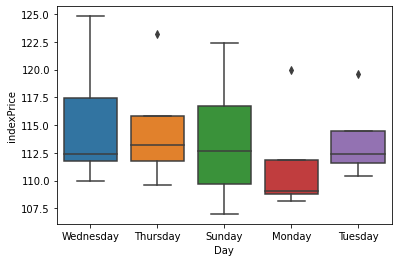

In [33]:
import matplotlib as plt 
import seaborn as sns
sdf=sd['2019-5'] 
sdd=sdf.Day
sdp=sdf.indexPrice
ax=sns.boxplot(x=sdd,y=sdp)


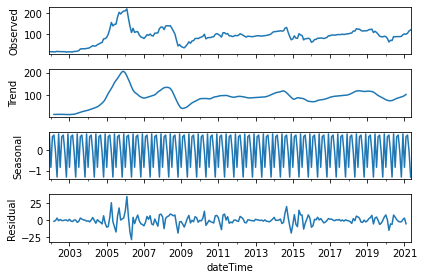

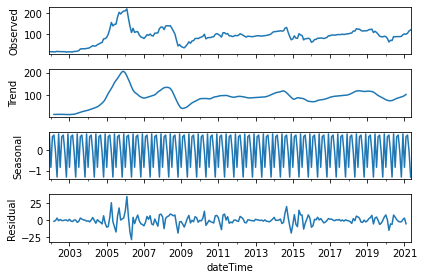

In [34]:
#import matplotlib.pyplot as plt
import statsmodels.api as sm
sdr=sd.resample('m').min()
ts=sm.tsa.seasonal_decompose(sdr.indexPrice,freq=6,model='additive')
#plt.figure(figsize=(25,8))
#print(sdr)
ts.plot()

DC Componnent= 227.8181818181818
Frequency Componants []
Amplitudes Values []


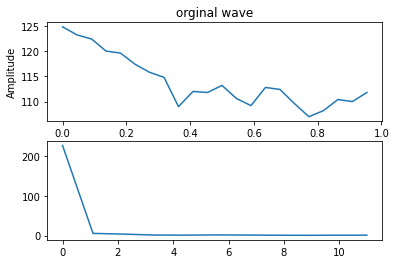

In [35]:
import matplotlib.pyplot as plt 
from scipy.fftpack import fft
from scipy.signal import find_peaks 
import numpy as np
from math import pi 

# Genrate Sign wave 
tr=1 ;# Time
Fs=len(sdf.indexPrice)#12*22 ; #Sampling Frequncy  
t=np.arange(0,tr,1/Fs) # Time Dimmension to feed the Signe Wave
f=30; # First Signal Frequency 
ff=50 ; # Second Signal Frequency 
fff=15
#x=20*np.sin(2*pi*f*t)+10*np.sin(2*pi*ff*t)+15+15*np.sin(2*pi*fff*t) # the two Sine Waves
x=np.array(sdf.indexPrice)
# Ploting the orginal Wave 
plt.subplot(2,1,1)
plt.plot(t,x);plt.title('orginal wave');plt.xlabel('Time');plt.ylabel('Amplitude')

## Compute FFT Magnitude positive side and multplay by 2 to make up for nigtive side
## and devided by size to get correct power 
fx=2*(abs(fft(x))[0:int(np.size(x)/2)])/np.size(x)
# Generate Frequency Axis 
n=np.size(x)

fr=(((1/tr)*Fs/2))*np.linspace(0,tr,int(n/2))
# Converting Frequency Axis to Days 
#fr=Fs/fr
# Ploting FFt (days in x-axis & amplitude in the Y Axiis )
plt.subplot(2,1,2)
plt.plot(fr,fx)
print(f'DC Componnent= {fx[0]}')
peaks,_=find_peaks(fx,height=2)
plt.plot(peaks,fx[peaks],'x',c='r')
print(f'Frequency Componants {peaks}')
print(f'Amplitudes Values {fx[peaks]}')